In [1]:
import fredapi as fa
import pandas as pd
#from local_settings import fred as settings
fred = fa.Fred(api_key='c065c27b3c6b11150d20e30606f2f099')
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Import libraries

from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta, date
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
#  Housing Inventory: Median Days on Market in the United States
# https://fred.stlouisfed.org/series/OBMMIFHA30YF
fred_housing1 = fred.get_series('MEDDAYONMARUS')
fred_housing1.name = 'fred_1'
fred_housing1.head()

2016-07-01    69.0
2016-08-01    73.0
2016-09-01    78.0
2016-10-01    79.0
2016-11-01    83.0
Name: fred_1, dtype: float64

In [4]:
#  Median Sales Price of Houses Sold for the United States 
# https://fred.stlouisfed.org/series/MSPUS
fred_housing2 = fred.get_series('MSPUS')
fred_housing2.name = 'fred_2'
fred_housing2.head()

1963-01-01    17800.0
1963-04-01    18000.0
1963-07-01    17900.0
1963-10-01    18500.0
1964-01-01    18500.0
Name: fred_2, dtype: float64

In [5]:
# Getting all the stock data (NVR, etc.)
stockSymbols = ['NVR','SPY']

In [6]:
# Getting the stock start date
Stock_dt = '2021-01-01'

# Getting end date
end_date = '2021-11-30'


In [7]:
# Getting today's date
#today = datetime.today().strftime('%Y-%m-%d')
#today

In [8]:
# Number of assets
num_assets = len(stockSymbols)

In [9]:
# creating a fn 
def getMyAssets(stock=stockSymbols, start=Stock_dt,end=end_date,col='Adj Close'):
    data = pdr.get_data_yahoo(stock, start = start, end=end)[col]
    return data

In [10]:
# Getting the adj. close prices
my_stocks = getMyAssets(stockSymbols)

[*********************100%***********************]  2 of 2 completed


In [11]:
my_stocks

,NVR,SPY
Date,,
2021-01-04,4040.649902,361.251129
2021-01-05,4008.909912,363.739197
2021-01-06,3966.489990,365.913849
2021-01-07,4025.929932,371.350342
2021-01-08,3930.000000,373.466248
...,...,...
2021-11-22,5210.819824,462.492249
2021-11-23,5320.000000,463.105499
2021-11-24,5351.399902,464.341919


In [12]:
df=pd.merge(my_stocks, fred_housing1, how='left',left_index=True, right_index=True)

In [13]:
df=pd.merge(df, fred_housing2, how='left',left_index=True, right_index=True)

In [14]:
# Creating a new df and using only the adj. close price
#df = my_stocks
df

,NVR,SPY,fred_1,fred_2
Date,,,,
2021-01-04,4040.649902,361.251129,NaN,NaN
2021-01-05,4008.909912,363.739197,NaN,NaN
2021-01-06,3966.489990,365.913849,NaN,NaN
2021-01-07,4025.929932,371.350342,NaN,NaN
2021-01-08,3930.000000,373.466248,NaN,NaN
...,...,...,...,...
2021-11-22,5210.819824,462.492249,NaN,NaN
2021-11-23,5320.000000,463.105499,NaN,NaN
2021-11-24,5351.399902,464.341919,NaN,NaN


In [15]:
df.tail(40)

,NVR,SPY,fred_1,fred_2
Date,,,,
2021-10-04,4781.859863,423.985046,NaN,NaN
2021-10-05,4781.819824,428.396576,NaN,NaN
2021-10-06,4803.500000,430.177002,NaN,NaN
2021-10-07,4869.779785,433.896210,NaN,NaN
2021-10-08,4838.240234,433.104858,NaN,NaN
2021-10-11,4840.859863,429.969330,NaN,NaN
2021-10-12,4856.250000,428.910919,NaN,NaN
2021-10-13,4873.720215,430.453979,NaN,NaN
2021-10-14,4998.370117,437.694489,NaN,NaN


In [16]:
df.fillna(method='bfill', inplace=True)

In [17]:
df.fillna(method='ffill', inplace=True)

In [18]:
df

,NVR,SPY,fred_1,fred_2
Date,,,,
2021-01-04,4040.649902,361.251129,64.0,382600.0
2021-01-05,4008.909912,363.739197,64.0,382600.0
2021-01-06,3966.489990,365.913849,64.0,382600.0
2021-01-07,4025.929932,371.350342,64.0,382600.0
2021-01-08,3930.000000,373.466248,64.0,382600.0
...,...,...,...,...
2021-11-22,5210.819824,462.492249,47.0,423600.0
2021-11-23,5320.000000,463.105499,47.0,423600.0
2021-11-24,5351.399902,464.341919,47.0,423600.0


In [19]:
# creating a variable for predicting stock price for n number of days into the future
forecast_out = 30
df['Prediction'] = df[['NVR']].shift(-forecast_out)
df

,NVR,SPY,fred_1,fred_2,Prediction
Date,,,,,
2021-01-04,4040.649902,361.251129,64.0,382600.0,4704.399902
2021-01-05,4008.909912,363.739197,64.0,382600.0,4705.979980
2021-01-06,3966.489990,365.913849,64.0,382600.0,4705.450195
2021-01-07,4025.929932,371.350342,64.0,382600.0,4656.029785
2021-01-08,3930.000000,373.466248,64.0,382600.0,4699.580078
...,...,...,...,...,...
2021-11-22,5210.819824,462.492249,47.0,423600.0,NaN
2021-11-23,5320.000000,463.105499,47.0,423600.0,NaN
2021-11-24,5351.399902,464.341919,47.0,423600.0,NaN


In [20]:
df.columns

Index(['NVR', 'SPY', 'fred_1', 'fred_2', 'Prediction'], dtype='object')

In [21]:
#scaler=MinMaxScaler()

In [22]:
#df[['NVR', 'SPY', 'fred_h', 'Prediction']]=scaler.fit_transform(df[['NVR', 'SPY', 'fred_h', 'Prediction']])

In [23]:
df

,NVR,SPY,fred_1,fred_2,Prediction
Date,,,,,
2021-01-04,4040.649902,361.251129,64.0,382600.0,4704.399902
2021-01-05,4008.909912,363.739197,64.0,382600.0,4705.979980
2021-01-06,3966.489990,365.913849,64.0,382600.0,4705.450195
2021-01-07,4025.929932,371.350342,64.0,382600.0,4656.029785
2021-01-08,3930.000000,373.466248,64.0,382600.0,4699.580078
...,...,...,...,...,...
2021-11-22,5210.819824,462.492249,47.0,423600.0,NaN
2021-11-23,5320.000000,463.105499,47.0,423600.0,NaN
2021-11-24,5351.399902,464.341919,47.0,423600.0,NaN


In [24]:
# Creating the independent dataset (X) and convertng to a numpy array
X = np.array(df.drop(['Prediction'],1))

# Removing the last n rows to remove NaNs
X = X[:-forecast_out]
X

array([[4.04064990e+03, 3.61251129e+02, 6.40000000e+01, 3.82600000e+05],
       [4.00890991e+03, 3.63739197e+02, 6.40000000e+01, 3.82600000e+05],
       [3.96648999e+03, 3.65913849e+02, 6.40000000e+01, 3.82600000e+05],
       [4.02592993e+03, 3.71350342e+02, 6.40000000e+01, 3.82600000e+05],
       [3.93000000e+03, 3.73466248e+02, 6.40000000e+01, 3.82600000e+05],
       [3.98687012e+03, 3.70948792e+02, 6.40000000e+01, 3.82600000e+05],
       [3.96318994e+03, 3.71027130e+02, 6.40000000e+01, 3.82600000e+05],
       [3.97139990e+03, 3.72026306e+02, 6.40000000e+01, 3.82600000e+05],
       [3.97505005e+03, 3.70723450e+02, 6.40000000e+01, 3.82600000e+05],
       [4.00994995e+03, 3.68019867e+02, 6.40000000e+01, 3.82600000e+05],
       [4.16000000e+03, 3.70909576e+02, 6.40000000e+01, 3.82600000e+05],
       [4.27881982e+03, 3.76042480e+02, 6.40000000e+01, 3.82600000e+05],
       [4.45150000e+03, 3.76385345e+02, 6.40000000e+01, 3.82600000e+05],
       [4.48591016e+03, 3.75053101e+02, 6.40000000e

In [25]:
# Creating the dependent dataset (y) and convertig to a numpy array
y = np.array(df['Prediction'])

# Getting all the y values except the last n rows, to remove NaNs
y = y[:-forecast_out]
y

array([4704.39990234, 4705.97998047, 4705.45019531, 4656.02978516,
       4699.58007812, 4699.97021484, 4491.41992188, 4500.83984375,
       4572.95996094, 4657.95996094, 4483.85009766, 4441.29980469,
       4624.62011719, 4699.75976562, 4702.08984375, 4776.41015625,
       4584.74023438, 4538.83007812, 4670.25      , 4629.04003906,
       4662.33007812, 4421.85009766, 4434.99023438, 4503.64013672,
       4463.10009766, 4539.64990234, 4567.85986328, 4722.74023438,
       4668.25976562, 4706.10986328, 4710.93017578, 4785.18017578,
       4827.43994141, 4837.77978516, 4776.41015625, 4748.49023438,
       4902.12988281, 4873.72998047, 4821.02001953, 4821.43994141,
       4844.22021484, 4984.85009766, 4984.41992188, 4906.22021484,
       4800.        , 4826.37011719, 4862.58984375, 4929.52978516,
       4978.81005859, 5005.62988281, 5023.91015625, 5018.10009766,
       5124.06982422, 5104.95019531, 5142.41992188, 5134.43994141,
       5211.37988281, 5215.81005859, 4988.02978516, 4749.37011

In [26]:
# splitting the data into training and testing set (80/20)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [27]:
# Creating and training the SVM model (Regressor)
svr_rbf = SVR(kernel = 'rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)


SVR(C=1000.0, gamma=0.1)

In [28]:
# Testing the model: score returns the coeff. of determination R^2 of predictions
svm_confidence = svr_rbf.score(x_test,y_test)
svm_confidence

-0.02029769621695232

In [29]:
# Creating and training the linear regression model
lr = LinearRegression()

# Training the model
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
# Testing the model: score returns the coeff. of determination R^2 of predictions
lr_confidence = lr.score(x_test,y_test)
lr_confidence

0.41034424329682584

In [31]:
# Creating and training the random forest model
rf = RandomForestRegressor(n_estimators=50,max_depth=3)

# Training the model
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=3, n_estimators=50)

In [32]:
# Testing the model: score returns the coeff. of determination R^2 of predictions
rf_confidence = rf.score(x_test,y_test)
rf_confidence

0.5973643772151167

In [33]:
# Setting x_test (forecast) for last 30 rows using Adj. Close
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
x_forecast

array([[5.01079004e+03, 4.42333557e+02, 4.70000000e+01, 4.23600000e+05],
       [5.03470020e+03, 4.45746124e+02, 4.70000000e+01, 4.23600000e+05],
       [5.05108984e+03, 4.47496857e+02, 4.70000000e+01, 4.23600000e+05],
       [4.90000000e+03, 4.48664062e+02, 4.70000000e+01, 4.23600000e+05],
       [4.87550000e+03, 4.48199158e+02, 4.70000000e+01, 4.23600000e+05],
       [4.87841992e+03, 4.50602783e+02, 4.70000000e+01, 4.23600000e+05],
       [4.87097998e+03, 4.51008301e+02, 4.70000000e+01, 4.23600000e+05],
       [4.81500000e+03, 4.49010254e+02, 4.70000000e+01, 4.23600000e+05],
       [4.90000000e+03, 4.53342712e+02, 4.70000000e+01, 4.23600000e+05],
       [4.89479980e+03, 4.54262573e+02, 4.70000000e+01, 4.23600000e+05],
       [4.92766992e+03, 4.55044037e+02, 4.70000000e+01, 4.23600000e+05],
       [4.90831006e+03, 4.56883820e+02, 4.70000000e+01, 4.23600000e+05],
       [5.02002002e+03, 4.59673187e+02, 4.70000000e+01, 4.23600000e+05],
       [5.05237988e+03, 4.61839417e+02, 4.70000000e

In [34]:
# Printing SVM predictions for next n days
svr_prediction = svr_rbf.predict(x_forecast)
#svr_prediction=scaler.inverse_transform([svr_prediction])
svr_prediction

array([4937.31442467, 4936.72595161, 4945.45743963, 4937.31439455,
       4937.31439456, 4937.31439455, 4937.31439455, 4937.31439455,
       4937.31439455, 4937.31439455, 4937.31439455, 4937.31439455,
       4937.31439455, 4937.31439455, 4937.31439455, 4937.31439455,
       4937.31439455, 4937.31439455, 4937.31439455, 4937.31439455,
       4937.31439455, 4937.31439455, 4937.31439455, 4937.31439455,
       4937.31439455, 4937.31439455, 4937.31439455, 4937.31439455,
       4937.31439455, 4937.31439455])

In [35]:
# Printing LR predictions for next n days
lr_prediction = lr.predict(x_forecast)
lr_prediction

array([5051.39396152, 5071.24026669, 5079.60055787, 5156.74380113,
       5163.42382722, 5183.55199411, 5190.4519734 , 5197.37661452,
       5198.4339072 , 5208.92766352, 5201.37097683, 5226.31680145,
       5201.82516492, 5206.83312732, 5204.82879759, 5208.93312067,
       5145.6465954 , 5150.1953554 , 5136.24199437, 5121.02576847,
       5111.75943684, 5177.53127584, 5170.13405663, 5206.23978854,
       5152.00293651, 5142.66087786, 5099.89599829, 5097.04274884,
       5031.39770509, 5085.15927449])

In [36]:
# Printing LR predictions for next n days
rf_prediction = rf.predict(x_forecast)
rf_prediction

array([4983.09875852, 4981.07216687, 4981.07216687, 5004.14360898,
       5004.14360898, 5004.14360898, 5004.14360898, 5004.14360898,
       5004.14360898, 5004.14360898, 4995.39906933, 5004.14360898,
       4983.09875852, 4981.07216687, 4978.61353953, 4978.61353953,
       4978.61353953, 4978.61353953, 4978.61353953, 4978.61353953,
       4978.61353953, 4978.61353953, 4978.61353953, 4978.61353953,
       4978.61353953, 4978.61353953, 4978.61353953, 4978.61353953,
       4978.61353953, 4978.61353953])

In [37]:
df['NVR']

Date
2021-01-04    4040.649902
2021-01-05    4008.909912
2021-01-06    3966.489990
2021-01-07    4025.929932
2021-01-08    3930.000000
                 ...     
2021-11-22    5210.819824
2021-11-23    5320.000000
2021-11-24    5351.399902
2021-11-26    5291.100098
2021-11-29    5281.729980
Name: NVR, Length: 229, dtype: float64

In [38]:
len(svr_prediction)

30

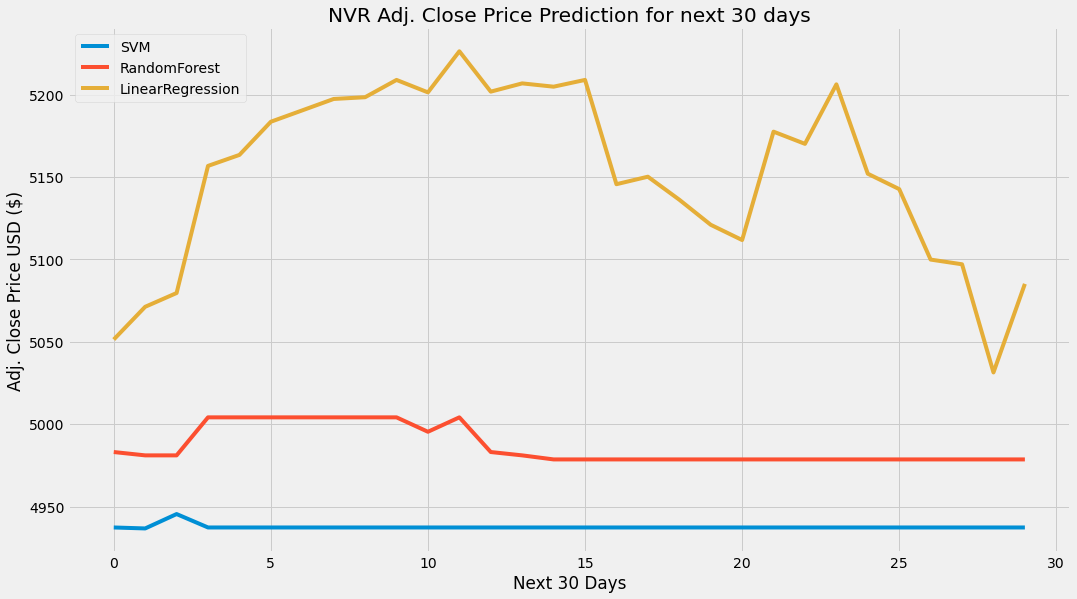

In [39]:
# visualizing the data
plt.figure(figsize=(16,9))

plt.plot(svr_prediction, label = 'SVM')
plt.plot(rf_prediction, label = 'RandomForest')
plt.plot(lr_prediction, label = 'LinearRegression')
plt.title('NVR Adj. Close Price Prediction for next 30 days')
plt.xlabel('Next 30 Days')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [40]:
# import NVR data for next 30 days to compare

NVR = pdr.get_data_yahoo('NVR',start='2021-12-01',end='2021-12-30')
NVR

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-01,5268.520020,5410.000000,5193.689941,5404.560059,5404.560059,60900
2021-12-02,5429.479980,5583.720215,5350.100098,5549.180176,5549.180176,26600
2021-12-03,5589.000000,5620.529785,5465.500000,5480.859863,5480.859863,24600
2021-12-06,5522.899902,5666.029785,5480.000000,5626.140137,5626.140137,16000
2021-12-07,5673.000000,5717.759766,5647.669922,5671.379883,5671.379883,15000
2021-12-08,5705.140137,5908.160156,5660.899902,5892.580078,5892.580078,42400
2021-12-09,5890.209961,5982.450195,5852.399902,5863.520020,5863.520020,23000
2021-12-10,5874.549805,5948.279785,5821.950195,5935.720215,5935.720215,12800
2021-12-13,5935.000000,5939.910156,5775.979980,5785.899902,5785.899902,19500


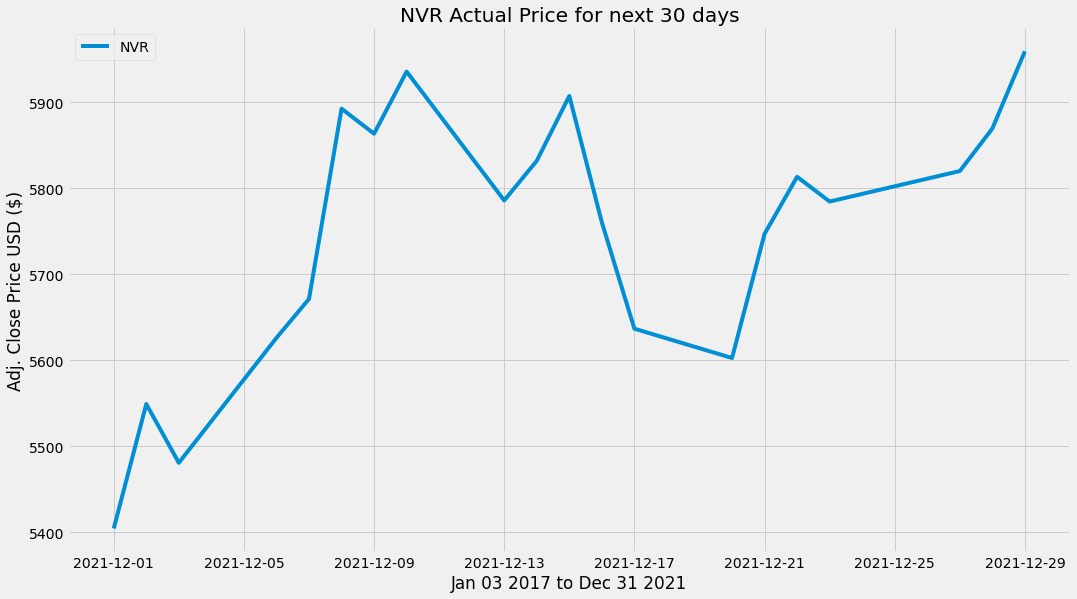

In [41]:
# visualizing the data
plt.figure(figsize=(16,9))
plt.plot(NVR['Adj Close'], label = 'NVR')
plt.title('NVR Actual Price for next 30 days')
plt.xlabel('Jan 03 2017 to Dec 31 2021')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()